In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(15,7)
import os

In [18]:
os.chdir("C:\\Users\\sowmy\\Downloads")

In [19]:
Electric_Data=pd.read_csv("Electric_Production.csv")

In [62]:
Electric_Data

,Value,First_Difference
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,-1.8332
1985-03-01,62.4502,-8.2218
1985-04-01,57.4714,-4.9788
1985-05-01,55.3151,-2.1563
...,...,...
2017-09-01,98.6154,-10.3158
2017-10-01,93.6137,-5.0017
2017-11-01,97.3359,3.7222


In [21]:
Electric_Data.isna().sum()

DATE     0
Value    0
dtype: int64

In [22]:
Electric_Data.duplicated().sum()

0

In [23]:
Electric_Data.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [24]:
Electric_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [25]:
Electric_Data['DATE']=pd.to_datetime(Electric_Data['DATE'])

In [26]:
Electric_Data['DATE'].dtypes

dtype('<M8[ns]')

In [27]:
Electric_Data=Electric_Data.set_index('DATE')

In [85]:
Electric_Data.resample('m').mean()

,Value,First_Difference
DATE,,
1985-01-31,72.5052,NaN
1985-02-28,70.6720,-1.8332
1985-03-31,62.4502,-8.2218
1985-04-30,57.4714,-4.9788
1985-05-31,55.3151,-2.1563
...,...,...
2017-09-30,98.6154,-10.3158
2017-10-31,93.6137,-5.0017
2017-11-30,97.3359,3.7222


In [86]:
Electric_Data

,Value,First_Difference
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,-1.8332
1985-03-01,62.4502,-8.2218
1985-04-01,57.4714,-4.9788
1985-05-01,55.3151,-2.1563
...,...,...
2017-09-01,98.6154,-10.3158
2017-10-01,93.6137,-5.0017
2017-11-01,97.3359,3.7222


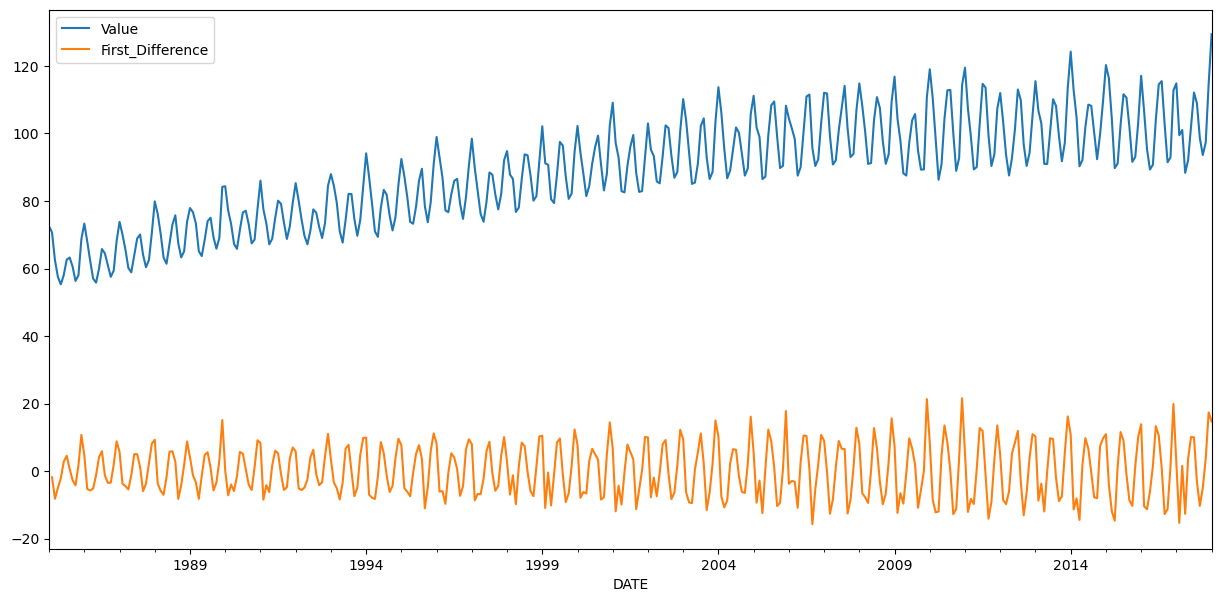

In [87]:
Electric_Data.plot()
plt.show()

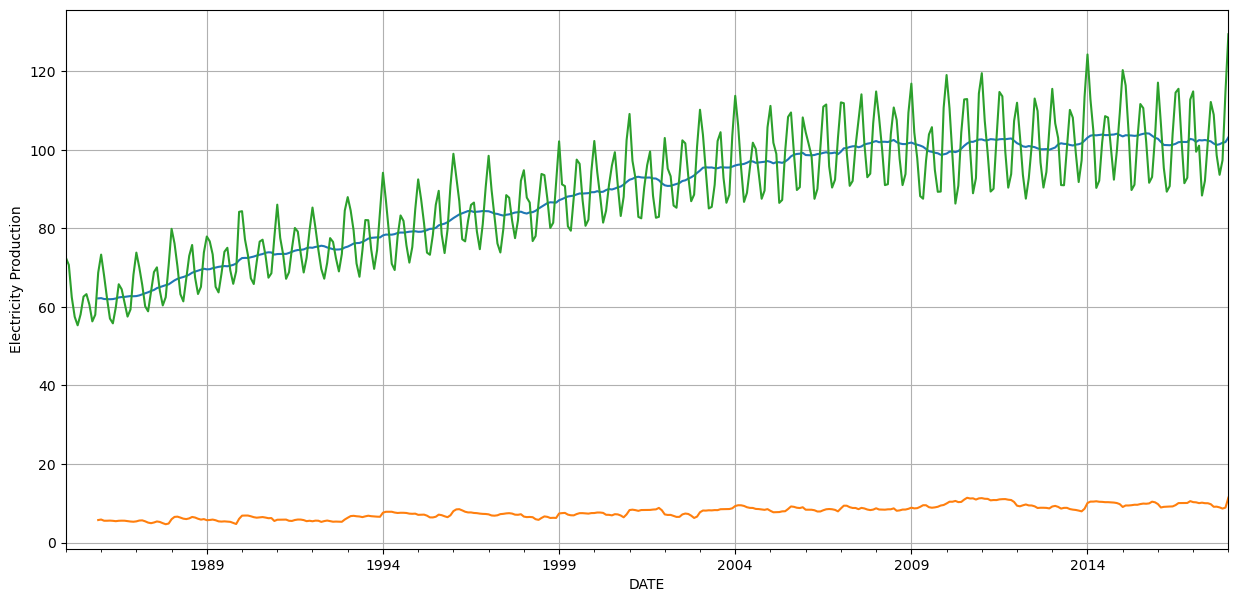

In [88]:
Electric_Data['Value'].rolling(12).mean().plot()
Electric_Data['Value'].rolling(12).std().plot()
Electric_Data['Value'].plot()
plt.grid('k')
plt.ylabel("Electricity Production")
plt.show()

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

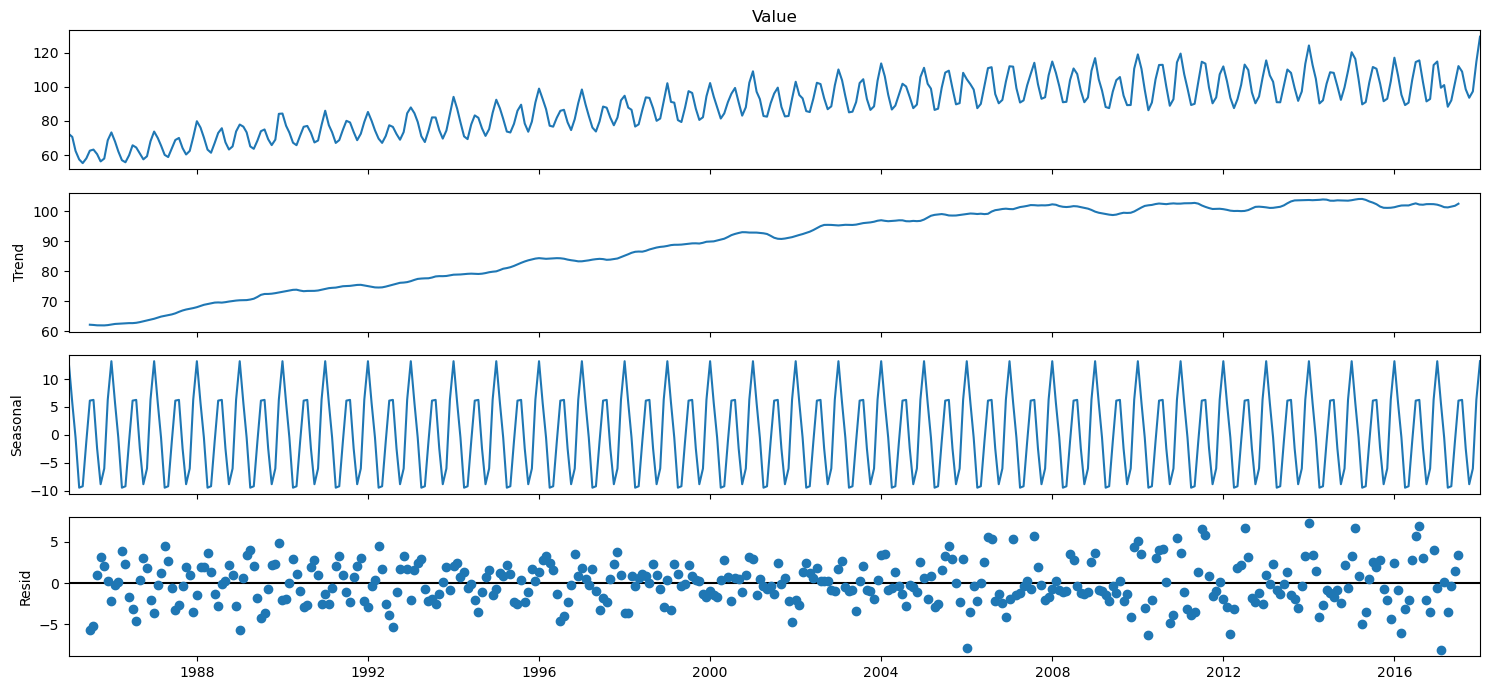

In [90]:
seasonal_decompose(Electric_Data['Value']).plot()
plt.show()

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
adfuller(Electric_Data['Value'])

(-2.256990350047245,
 0.1862146911658677,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [93]:
def Test(x):
    print("Total Lags:",x[2])
    print("Total Lags:",x[3])
    if x[1]<.05:
        print("Time Series is Stationery")
    else:
        print("Time Series is Not  Stationery")
        

In [94]:
Test(adfuller(Electric_Data['Value']))

Total Lags: 15
Total Lags: 381
Time Series is Not  Stationery


In [95]:
Electric_Data['First_Difference']=Electric_Data['Value']-Electric_Data['Value'].shift(1)

In [96]:
Electric_Data

,Value,First_Difference
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,-1.8332
1985-03-01,62.4502,-8.2218
1985-04-01,57.4714,-4.9788
1985-05-01,55.3151,-2.1563
...,...,...
2017-09-01,98.6154,-10.3158
2017-10-01,93.6137,-5.0017
2017-11-01,97.3359,3.7222


In [97]:
Test(adfuller(Electric_Data['First_Difference'].dropna()))

Total Lags: 14
Total Lags: 381
Time Series is Stationery


In [98]:
Train=Electric_Data.iloc[:380,0]

In [99]:
Test=Electric_Data.iloc[380:,0]

In [100]:
from pmdarima import auto_arima

In [101]:
auto_arima(Electric_Data['Value'],m=12,D=1,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1787.717, Time=1.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.162, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.101, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1835.298, Time=0.28 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1786.286, Time=1.05 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1787.290, Time=4.76 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1869.944, Time=1.31 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1785.844, Time=2.46 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=1773.277, Time=3.02 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=1775.009, Time=2.60 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1771.882, Time=2.62 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1784.983, Time=2.62 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=1773.624, Time=1.46 sec
 ARIMA(1,1,2)(1,1,1)[12]

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True)

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [103]:
Model=SARIMAX(Train,order=(1,1,1),seasonal_order=(2,1,2,12))

C:\ProgramData\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [104]:
Predictor=Model.fit()

In [105]:
predicted=Predictor.predict(start=len(Train),end=len(Train)+len(Test)-1,typ='levels')

C:\ProgramData\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [106]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [107]:
r2_score(predicted,Test)

0.8194432352293499

In [108]:
mean_squared_error(predicted,Test)

15.4449086699557

In [109]:
mean_absolute_error(predicted,Test)

2.8509563729987843

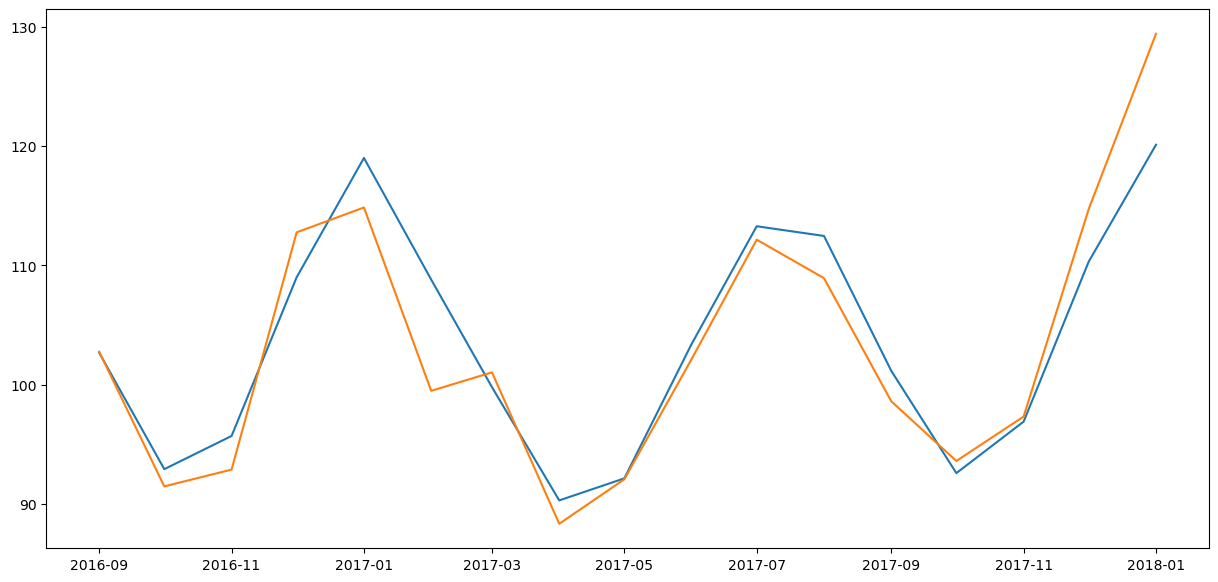

In [111]:
plt.plot(predicted)
plt.plot(Test)
plt.show()

In [114]:
Predicted_full_Dataset=Predictor.predict(start=0,end=396,typ='levels')

In [115]:
r2_score(Predicted_full_Dataset,Electric_Data['Value'])

0.9136253174632564

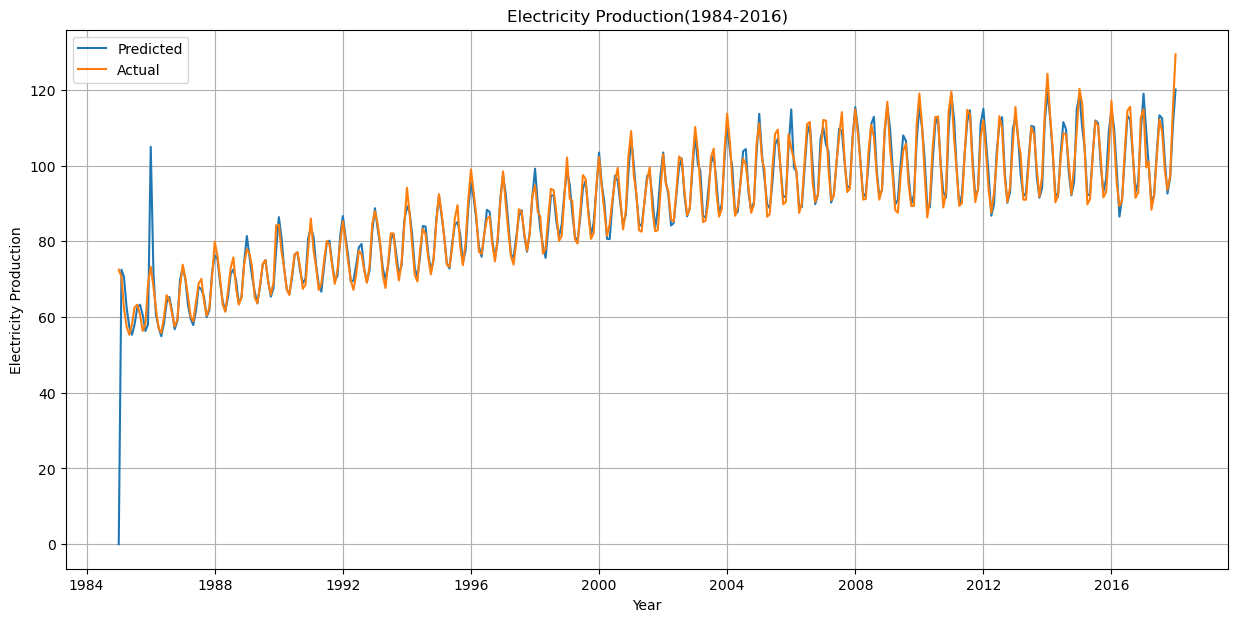

In [125]:
plt.plot(Predicted_full_Dataset,label='Predicted')
plt.plot(Electric_Data['Value'],label='Actual')
plt.xlabel("Year")
plt.ylabel("Electricity Production")
plt.legend()
plt.title("Electricity Production(1984-2016)")
plt.grid()
plt.show()


In [144]:
Forecast=Predictor.predict(start=396,end=396+24,typ='levels')

C:\ProgramData\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


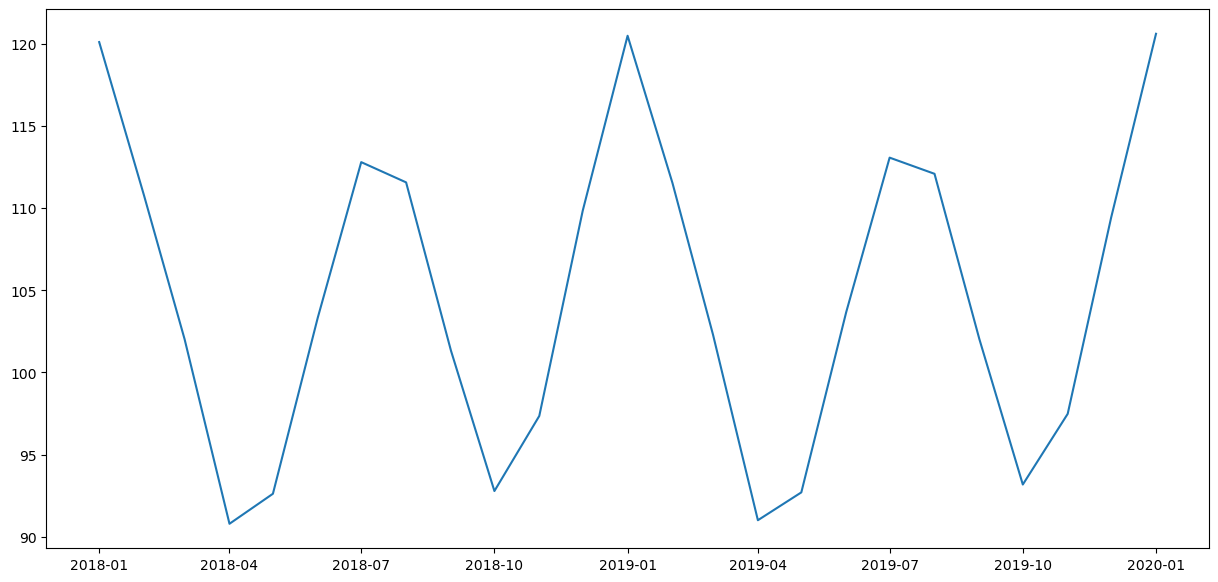

In [145]:
plt.plot(Forecast)
plt.show()

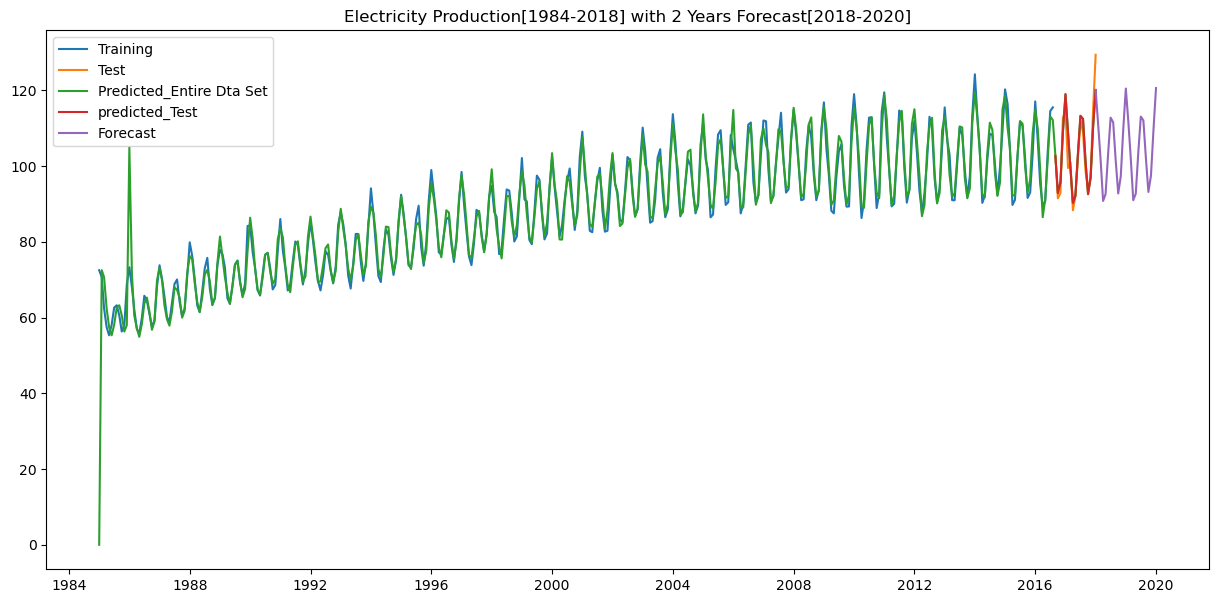

In [153]:
plt.plot(Train,label='Training')
plt.plot(Test,label='Test')
plt.plot(Predicted_full_Dataset,label='Predicted_Entire Dta Set')
plt.plot(predicted,label='predicted_Test')
plt.plot(Forecast,label='Forecast')
plt.title("Electricity Production[1984-2018] with 2 Years Forecast[2018-2020]")
plt.legend()
plt.show()